# Nuages de mots

## Imports et stopwords

In [6]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
from nltk.tokenize import wordpunct_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tommy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "tél", "Soir", "ecr", 
       "rue", "bon", "Bruxelles","bruxelles", "prix", "Brux", "ans", "maison", "écrire", 
       "près", "peu", "dés", "ecrire", "Brux", "brux", "part", "grand", "vendre", "très", 
       "vend", "prés", "mod", "etc", "avant", "pet", "cherche", "vente"
       ]

sw = set(sw)


## Nettoyer le fichier contenant les textes de 1965

### Rappeler les variables liées aux fichiers de 1965 du notebook précédent

In [8]:

annee_choisie = "1965"
folder_path = r"C:\Users\tommy\TAC2\TAC\data\txt"
corpus_file = os.path.join(folder_path, f"corpus_{annee_choisie}.txt")

### Créer la fonction de nettoyage adaptée à l'exercice en cours

In [9]:
def clean_corpus(corpus_file, output_path=None, extra_stopwords=None, lang="french"):
    # Déterminer le chemin de sortie si non fourni
    if output_path is None:
        base, ext = os.path.splitext(corpus_file)
        output_path = f"{base}_clean.txt"

    # Stopwords
    sw = set(stopwords.words(lang))
    if extra_stopwords:
        sw |= {w.lower() for w in extra_stopwords}

    # Lecture
    with open(corpus_file, "r", encoding="utf-8") as f:
        text = f.read()

    # Tokenisation
    tokens = wordpunct_tokenize(text)

    # Filtre
    kept = [t.upper() for t in tokens if len(t) > 2 and t.isalpha() and t.lower() not in sw]

    # Écriture
    kept_string = " ".join(kept)
    with open(output_path, "w", encoding="utf-8") as out:
        out.write(kept_string)

    return output_path

### Appliquer la fonction sur le fichier complet de l'année

In [10]:
corpus_file = os.path.join(folder_path, f"corpus_{annee_choisie}.txt")

# ajoute ici tes stopwords spécifiques si besoin
extra_sw = {"bruxelles", "belgique"}  # exemple

clean_path = clean_corpus(corpus_file, extra_stopwords=extra_sw)
print(f"✅ Texte nettoyé écrit dans : {clean_path}")

✅ Texte nettoyé écrit dans : C:\Users\tommy\TAC2\TAC\data\txt\corpus_1965_clean.txt


In [12]:
# Vérifier le résultat
with open(clean_path, 'r', encoding='utf-8') as f:
    after = f.read()

print(after[:500])

TXT SOIR MERCREDI JANVIER MOTS CROISÉS SOLUTION PROBLÈME SOCIÉTÉS BOURSES ETRANGERES BELGE BELGE BELGE FONDS ROUTES IDEM SABENA IRE SÉRIE OBI PETROFINA CONGO CONGO FSS CONGO FSS CONGO FSS CONGO FSS BROCKVILLE CHEMICALS PORT BROCKVILLE CHEMICALS UNITÉ CANADIAN INV FUND PORTEUR ISO CANAFUND VOTING TRUST CERT PART FRENCH PETRO PORTEUR LAFARGE CERNENT IDEM ACT ORD PORTEUR SHELL PORT ORIG WESTBURNE OIL POR TEUR BANQUE EUROPÉENNE INVEST IDEM IDEM COURS COMMUNIQUÉS ÉTRANGER FONC FRANCE BANCO FÔMENTO CA


## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
with open(clean_path, 'r', encoding='utf-8') as f:
    text_clean = f.read()

Counter(text_clean.split()).most_common(30)

[('RUE', 1317),
 ('PLUS', 1205),
 ('TÉL', 1111),
 ('ROSSEL', 796),
 ('ANS', 672),
 ('DEUX', 653),
 ('TOUT', 605),
 ('CETTE', 597),
 ('VAN', 580),
 ('DEM', 568),
 ('PRIX', 509),
 ('APRÈS', 502),
 ('BIEN', 496),
 ('SANS', 488),
 ('TRÈS', 464),
 ('BRUX', 460),
 ('COMME', 450),
 ('FAIRE', 450),
 ('ÊTRE', 434),
 ('PART', 420),
 ('SOUS', 414),
 ('HEURES', 405),
 ('SAINT', 391),
 ('GRAND', 390),
 ('AGENCE', 389),
 ('ECRIRE', 376),
 ('SOIR', 370),
 ('TOUS', 361),
 ('PLACE', 349),
 ('FAIT', 347)]

### Créer, stocker et afficher le nuage de mots

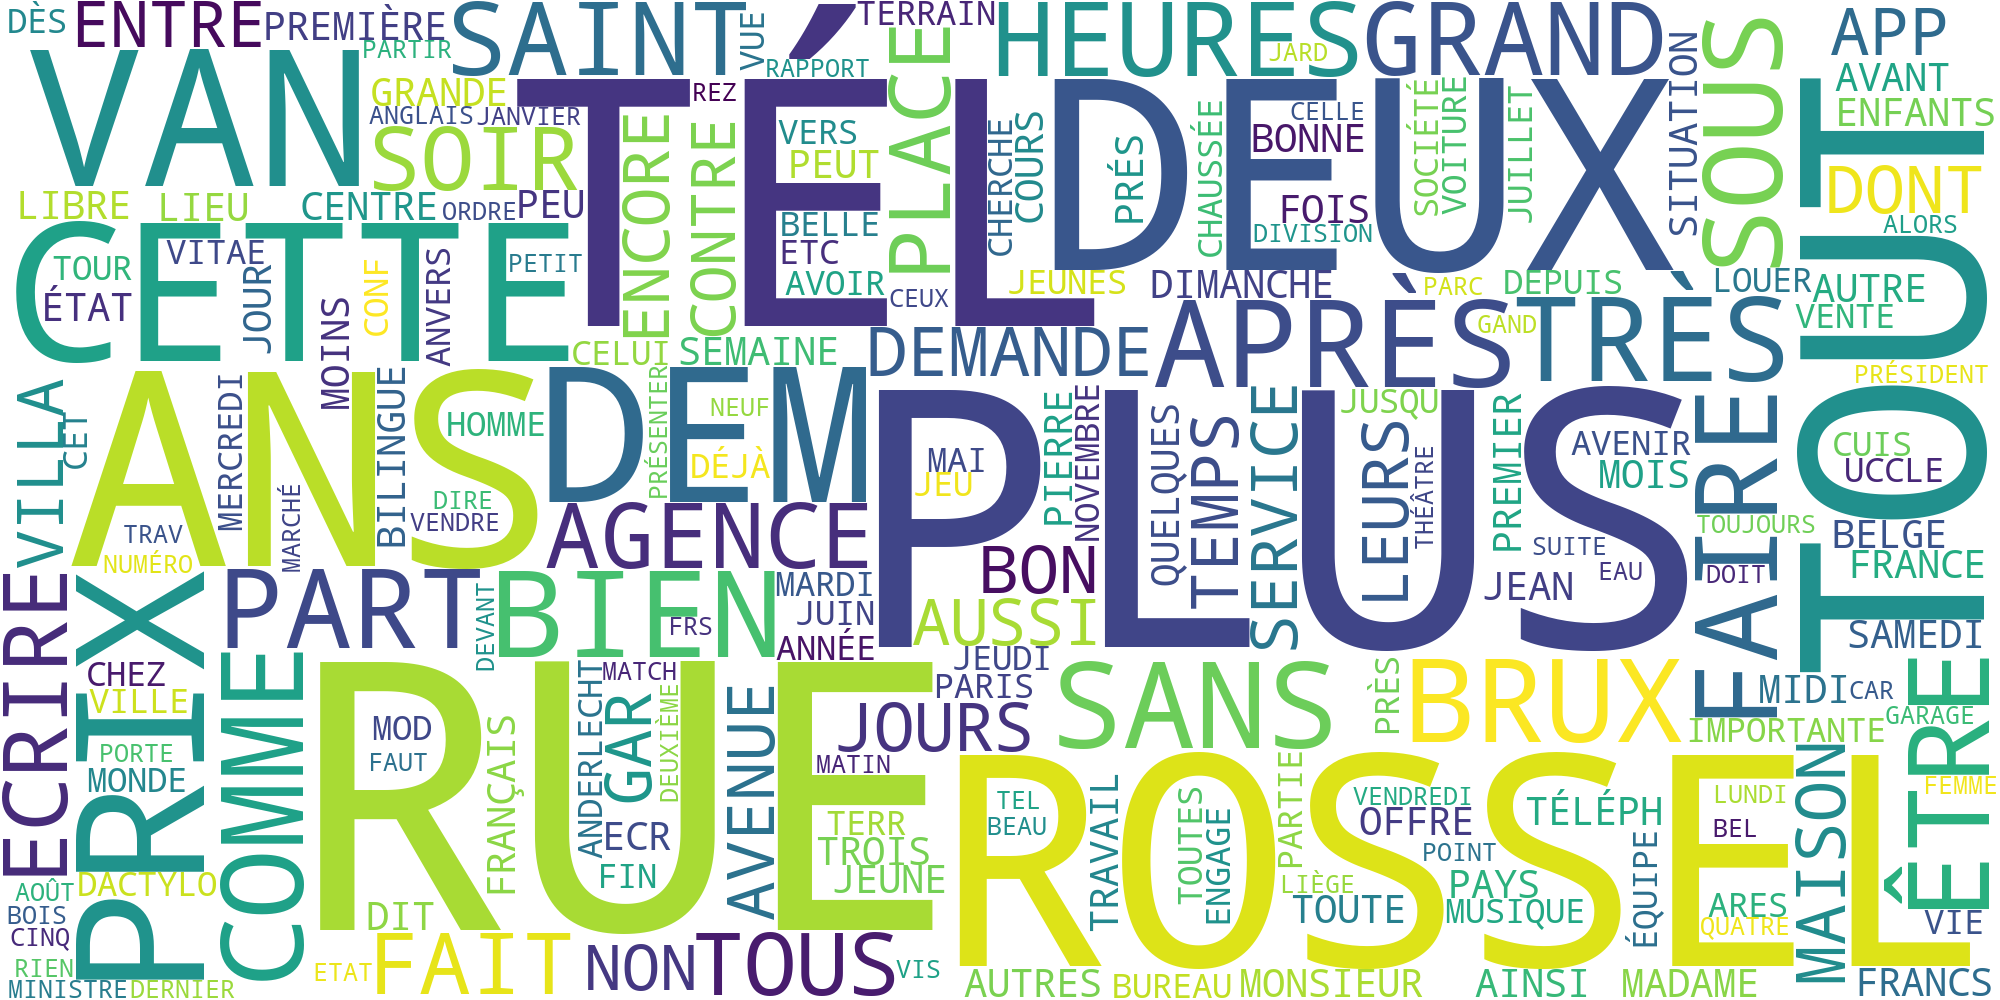

In [15]:
freq = Counter(text_clean.split())  # ← crée le dictionnaire des fréquences

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(freq)
cloud.to_file(os.path.join(folder_path, f"corpus_{annee_choisie}.png"))
Image(filename=os.path.join(folder_path, f"corpus_{annee_choisie}.png"))